In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('telecom_churn (2).csv')

In [38]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [40]:
df= df.replace({'Yes': 1, 'No':0})
df= df.replace({True: 1, False:0})

In [41]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #этот класс приводит данные в столбце к числовому виду

In [43]:
df['State']=le.fit_transform(df['State'].values) # перекодирование столбца в числовой вид

In [44]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Предобработка данных выполнена

In [45]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [46]:
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)

In [47]:
df_point = df['Churn']
df_value = df
df_value.drop('Churn', axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


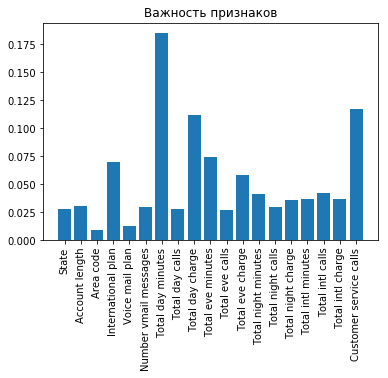

In [50]:
rf_model = rf.fit(df_value, df_point) #тренируем модель
names = df_value.columns.values 
ticks = [i for i in range(len(rf_model.feature_importances_))]

# строим график
plt.figure()
plt.title('Важность признаков')
plt.bar(names, rf_model.feature_importances_)
plt.xticks(ticks, names, rotation = 90)
plt.show()

In [51]:
from sklearn.feature_selection import SelectFromModel # для выбора функций на основе весов важности

In [52]:
selector = SelectFromModel(rf,  threshold = 0.1) 
# threshold -значение, при котором объекты с меньшей важжностью отбрасываются

In [53]:
imp = selector.fit_transform(df_value, df_point)
imp

array([[265.1 ,  45.07,   1.  ],
       [161.6 ,  27.47,   1.  ],
       [243.4 ,  41.38,   0.  ],
       ...,
       [180.8 ,  30.74,   2.  ],
       [213.8 ,  36.35,   2.  ],
       [234.4 ,  39.85,   0.  ]])

In [54]:
from sklearn.model_selection import train_test_split
v_train, v_test, p_train, p_test = train_test_split(df_value, df_point, test_size = 0.2, random_state = 0)

### Необходимо выбрать модель классификации по подпишется ли клиент на срочный депозит, обосновать выбор модели. Необходимо обучить модель на обучающей выборке и протестировать. Необходимо предоставить показатели точности работы выбранной модели и всех рассматриваемых.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # для оценки точности

In [57]:
# логистическая регрессия
model_lr = LogisticRegression()
model_lr.fit(v_train, p_train)
pred = model_lr.predict(v_test)
accuracy_score(p_test, pred)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8725637181409296

In [58]:
# случайный лес
model_rf = RandomForestClassifier(random_state = 0, n_jobs = -1) 
model_rf.fit(v_train, p_train)
pred_rf = model_rf.predict(v_test)
accuracy_score(p_test, pred_rf)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9460269865067467